In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test0  original shape", X_test[0].shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test0  original shape (28, 28)


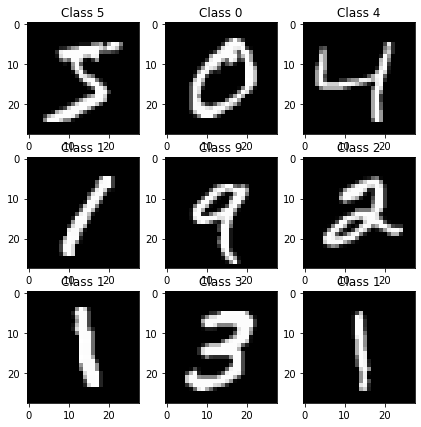

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [7]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(len(Y_train))
print(len(Y_train[0]))
print(Y_train)
print(Y_test)

60000
12
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [9]:
linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 8s 128us/step - loss: 0.2541 - val_loss: 0.1070
Epoch 2/4
60000/60000 [==============================] - 8s 125us/step - loss: 0.1017 - val_loss: 0.0902
Epoch 3/4
60000/60000 [==============================] - 7s 122us/step - loss: 0.0747 - val_loss: 0.0675
Epoch 4/4
60000/60000 [==============================] - 8s 128us/step - loss: 0.0569 - val_loss: 0.0676


In [11]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 0s 38us/step
0.06763587727408157


In [12]:

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

print(predicted_classes)
print(len(predicted_classes))

# Check which items we got right / wrong
predictyes=(predicted_classes == y_test)
print(predictyes)

predictnum=np.nonzero(predictyes)
print(predictnum)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("correct",correct_indices)
print("incorrect",incorrect_indices)

[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)
correct [   0    1    2 ... 9997 9998 9999]
incorrect [   8   92  125  151  241  259  321  359  381  414  444  445  478  495
  530  582  613  659  691  720  844  877  882  951  965 1014 1039 1107
 1112 1156 1178 1181 1194 1224 1226 1232 1242 1247 1260 1282 1299 1319
 1326 1328 1337 1395 1425 1429 1494 1520 1530 1549 1553 1609 1641 1678
 1681 1717 1790 1901 1911 1941 1984 2016 2029 2035 2040 2053 2073 2098
 2109 2118 2129 2135 2189 2224 2266 2272 2293 2369 2387 2406 2408 2414
 2433 2488 2582 2597 2607 2635 2648 2654 2720 2743 2769 2812 2863 2877
 2896 2921 2927 2939 2953 2979 3060 3073 3206 3503 3520 3558 3597 3629
 3767 3776 3780 3808 3850 3853 3869 3893 3943 3976 3985 4000 4065 4075
 4078 4163 4176 4177 4224 4238 4248 4259 4261 4289 4294 4360 4369 4374
 4405 4425 4463 4477 4497 4500 4534 4540 4548 4633 4656 4690 4740 4751
 4761 4807 4823 4874 4876 4879 491

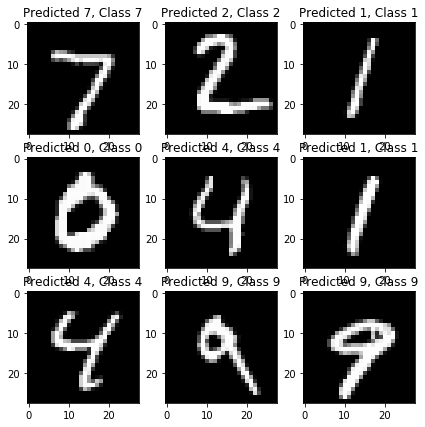

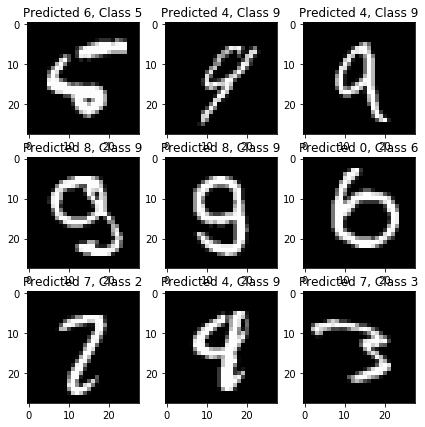

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [19]:
import cv2
import numpy as np

img=cv2.imread("1.jpg")
#cv2.imshow("mw",img)
#cv2.waitKey(0)
import cv2
import numpy as np
W=290
L=455
NW=280
NL=280
X0=125
Y0=160
for i in range(2):
    for j in range(4):
        imdig=img[X0+L*i:X0+L*i+NL,Y0+W*j:Y0+W*j+NW]
        cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(Y0+W*j,X0+L*i),(Y0+W*j+NW,X0+L*i+NL),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
import cv2  

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg


In [22]:
import cv2
img = cv2.imread("hn28inv11.jpg")
print(len(img))
print(len(img[0]))
cv2.imshow("hninv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

28
28


x to be predicted original shape (28, 28, 3)
x to be predicted original shape (28, 28)


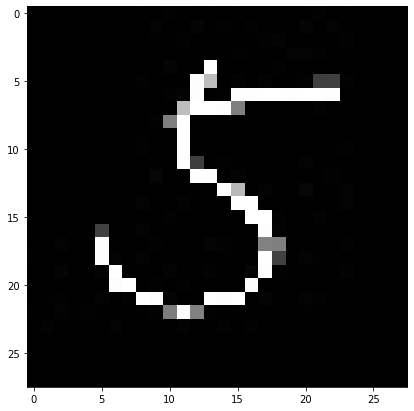

In [23]:
print("x to be predicted original shape", img.shape)
GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("x to be predicted original shape", GrayImg.shape)
plt.imshow(GrayImg, cmap='gray', interpolation='none')

In [24]:
X_pred = GrayImg.reshape(1, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Predicating matrix shape", X_pred.shape)

Predicating matrix shape (1, 784)


In [25]:
predicted_classes = model.predict_classes(X_pred)

print(predicted_classes)

[5]


In [26]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

(8, 28, 28)


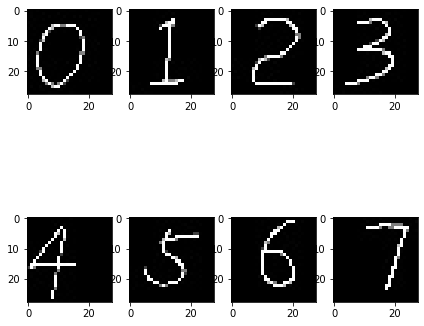

In [27]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [28]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

Testing matrix shape (8, 784)
[3 5 2 3 8 5 6 6]


In [29]:
model.save("ministxkn.h5")

In [30]:
del model

In [31]:
try:
    predicted_classes = model.predict_classes(X_pred)
except:
    print("model not found, you have deleted it on purpose.")

model not found, you have deleted it on purpose.


In [32]:
from keras.models import load_model

model = load_model('ministxkn.h5')

In [33]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[3 5 2 3 8 5 6 6]


In [34]:
print(X_train.shape)
print(X_pred.shape)

(60000, 784)
(8, 784)


In [35]:
print(X_train[0:8])
print(X_pred[0:8])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [36]:
X_train[0:8]=X_pred

In [37]:
print(X_train[0:8])

[[0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [38]:
for i in range(8):
    y_train[i]=i

In [39]:
print(y_train[0:10])

[0 1 2 3 4 5 6 7 1 4]


In [40]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [41]:
print(Y_train[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [42]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 124us/step - loss: 0.0461 - val_loss: 0.0628
Epoch 2/4
60000/60000 [==============================] - 9s 142us/step - loss: 0.0410 - val_loss: 0.0648
Epoch 3/4
60000/60000 [==============================] - 8s 132us/step - loss: 0.0356 - val_loss: 0.0599
Epoch 4/4
60000/60000 [==============================] - 8s 139us/step - loss: 0.0311 - val_loss: 0.0576


In [43]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[0 1 2 3 4 5 6 7]
